In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy

warnings.filterwarnings('ignore')


 Завдання 0: Завантаження та перейменування колонок

In [17]:
customer_set = pd.read_csv('Mall_Customers.csv')

customer_set.rename(columns={'Annual Income (k$)': 'Income',
                             'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

task1

In [18]:
print(customer_set.columns)
print(customer_set.shape)
print(customer_set.describe())
print(customer_set.isna().sum())

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
(200, 5)
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


task2 Видалення змінної CustomerID

In [19]:
customer_set.drop('CustomerID', axis=1, inplace=True)

Завдання 3: Діаграми розподілу

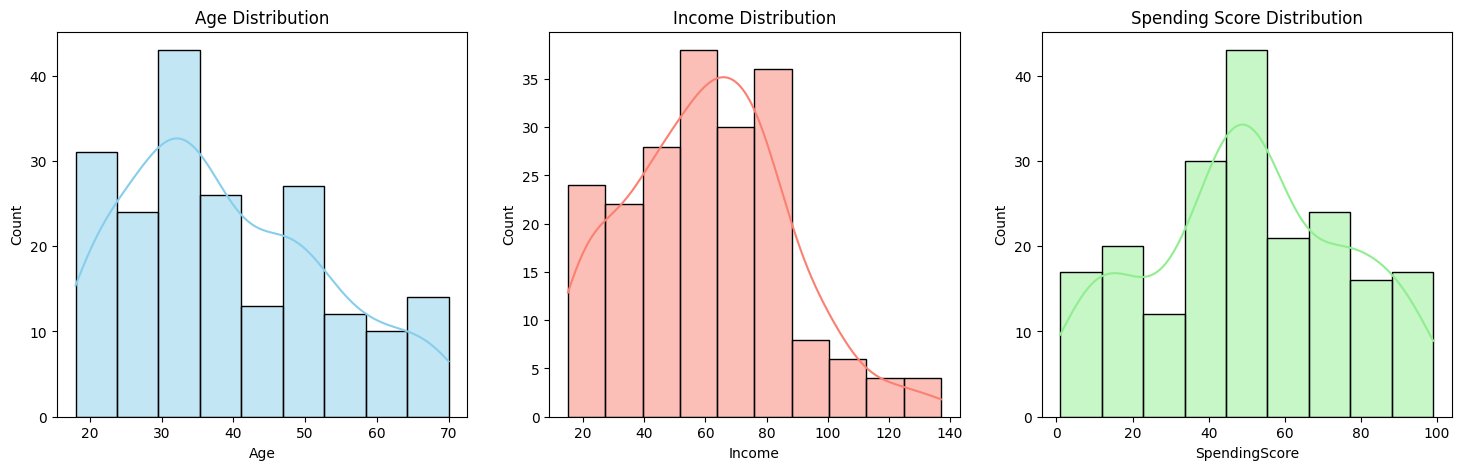

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(customer_set['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(customer_set['Income'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Income Distribution')

sns.histplot(customer_set['SpendingScore'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Spending Score Distribution')
plt.show()

task 4 
Pairplot за Gender

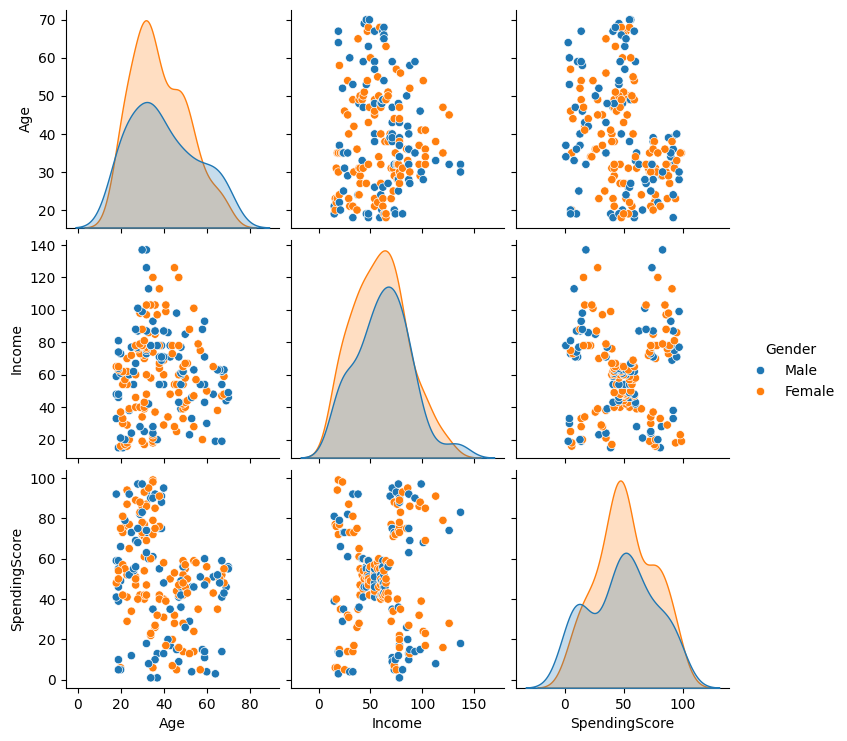

In [21]:
sns.pairplot(customer_set, hue='Gender')
plt.show()

 PairGrid  із графіками

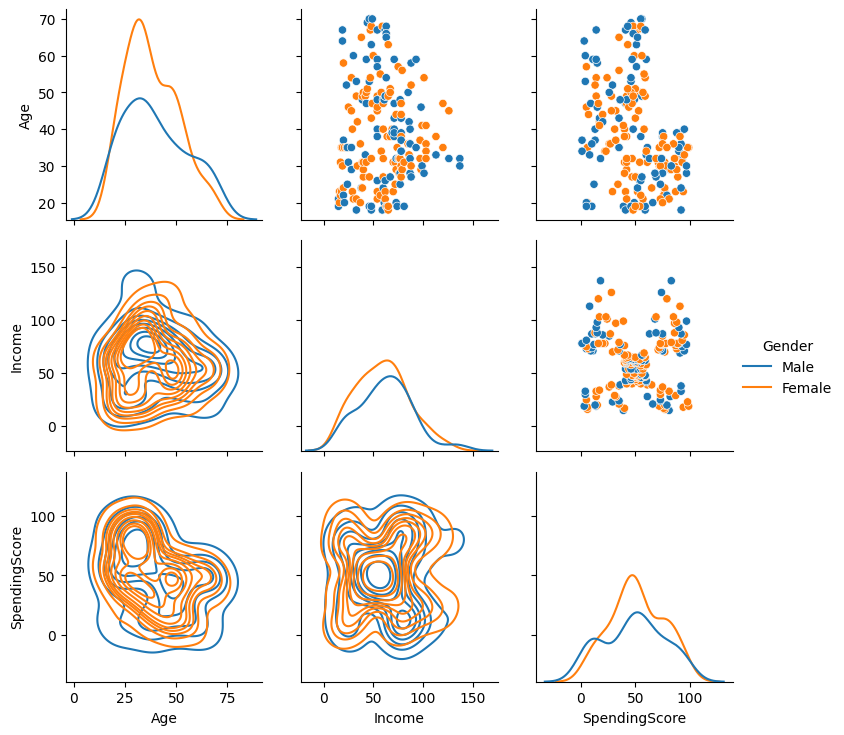

In [22]:
g = sns.PairGrid(customer_set, hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()
plt.show()

task 5   Аналіз Gender

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


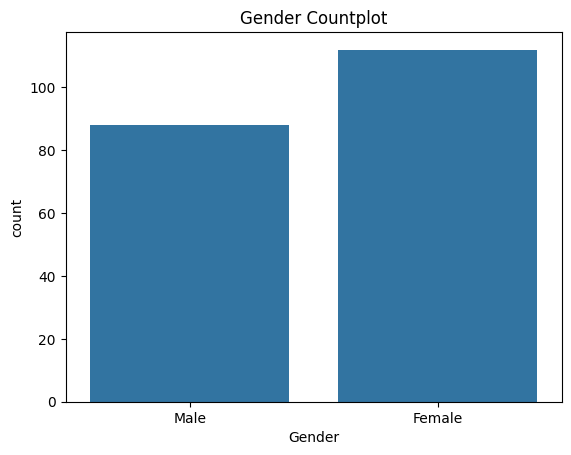

In [23]:
print(customer_set['Gender'].value_counts(normalize=True))
sns.countplot(x='Gender', data=customer_set)
plt.title('Gender Countplot')
plt.show()

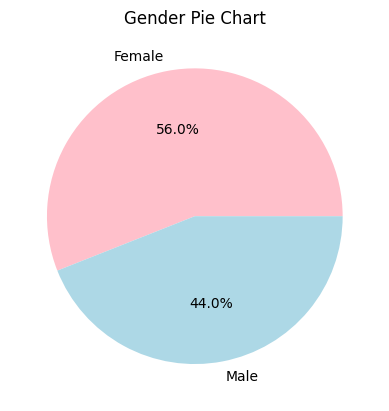

In [24]:

customer_set['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink','lightblue'])
plt.title('Gender Pie Chart')
plt.ylabel('')
plt.show()

task 6 Histplot для Age та Income за Gender

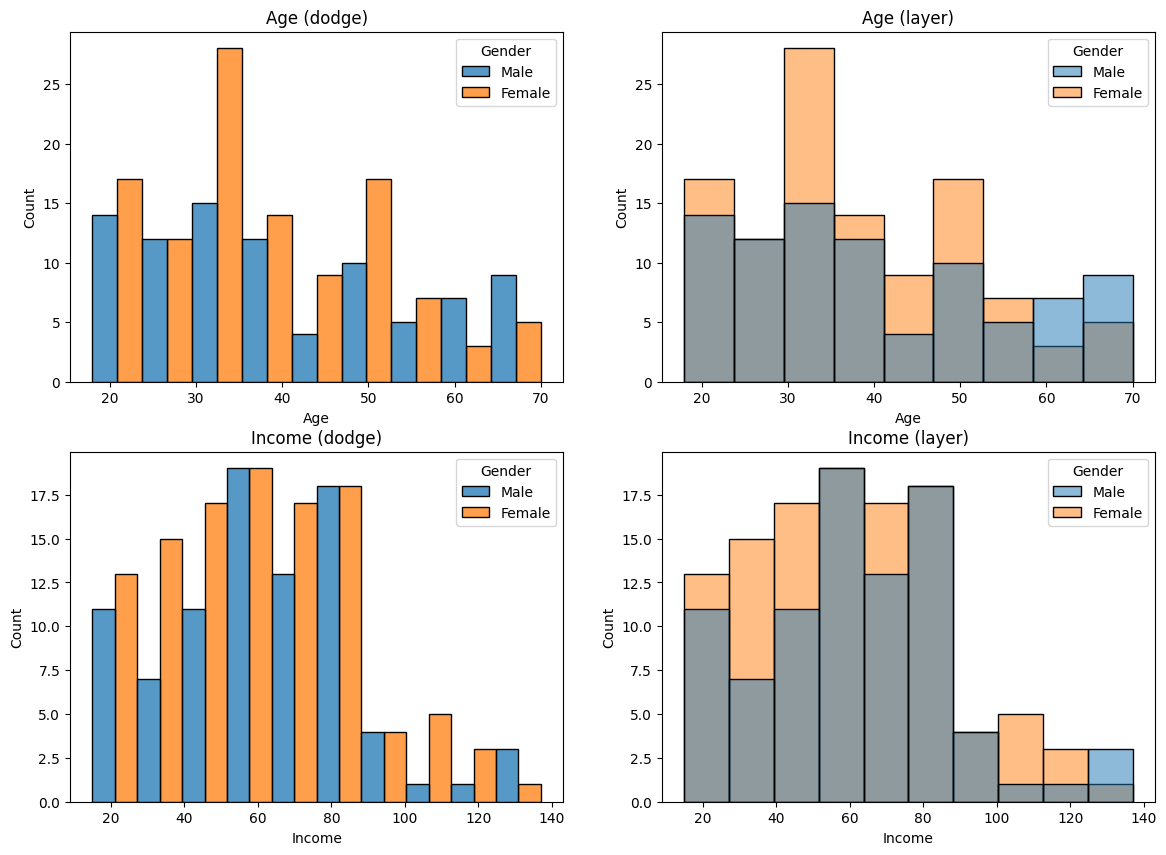

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', ax=axes[0,0])
axes[0,0].set_title('Age (dodge)')

sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', ax=axes[0,1])
axes[0,1].set_title('Age (layer)')

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', ax=axes[1,0])
axes[1,0].set_title('Income (dodge)')

sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', ax=axes[1,1])
axes[1,1].set_title('Income (layer)')
plt.show()

task 7 Histplot для SpendingScore за Gender

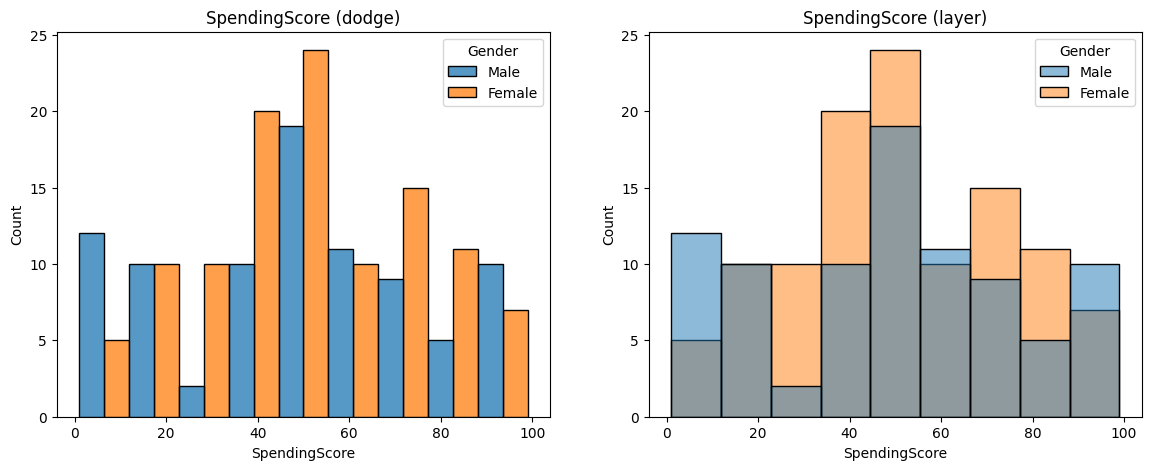

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', ax=axes[0])
axes[0].set_title('SpendingScore (dodge)')

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', ax=axes[1])
axes[1].set_title('SpendingScore (layer)')
plt.show()

task 8  Boxplot SpendingScore vs Gender

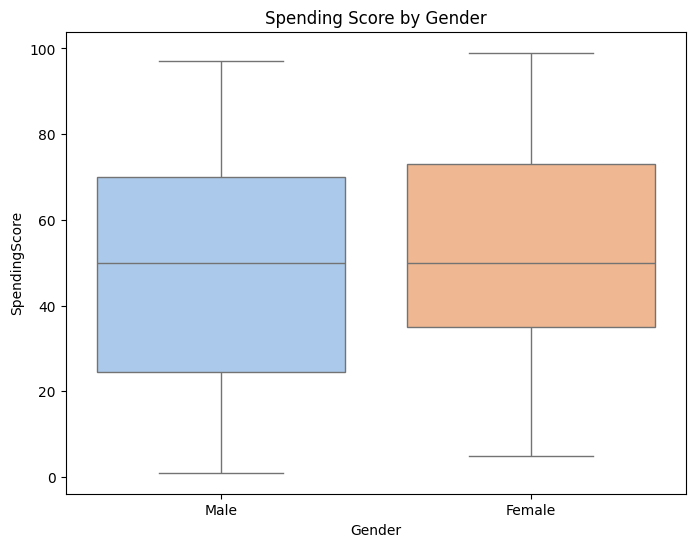

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set, palette='pastel')
plt.title('Spending Score by Gender')
plt.show()

task 9  Elbow method для визначення оптимальної кількості кластерів

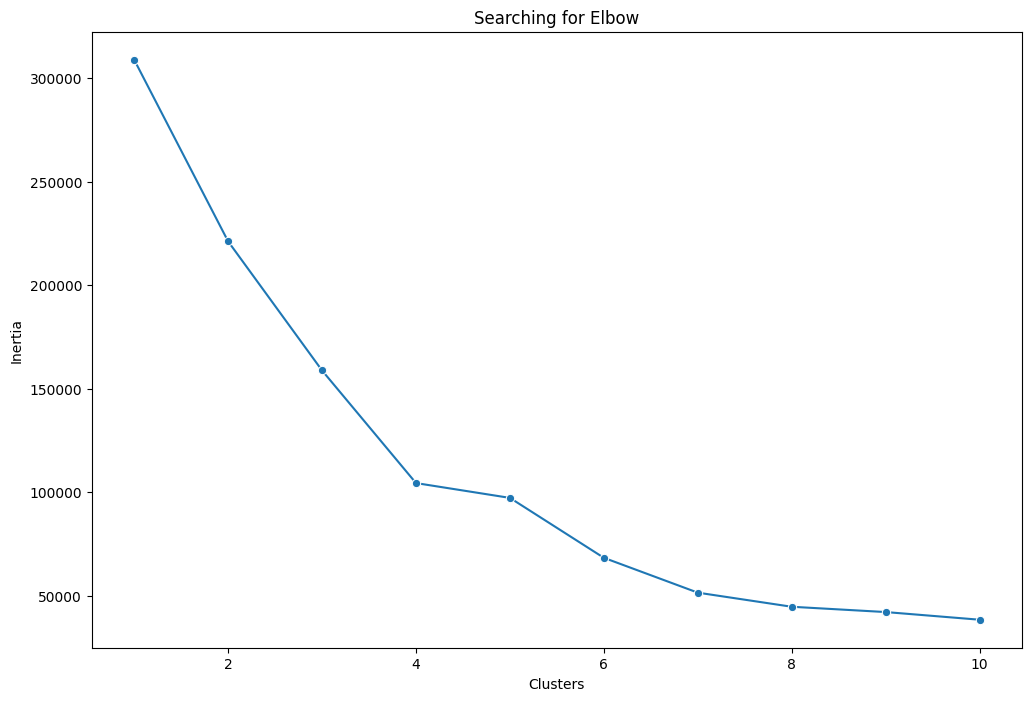

In [29]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, marker='o')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

task  10: 2d візуалізація KMeans кластеризації (Income vs SpendingScore)

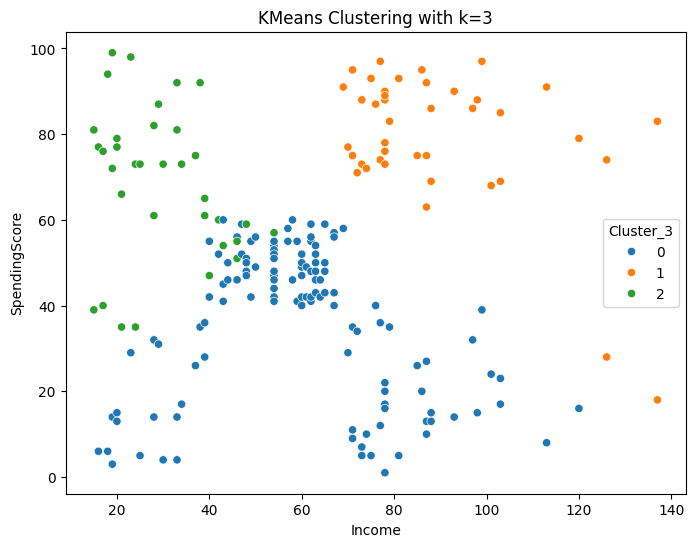

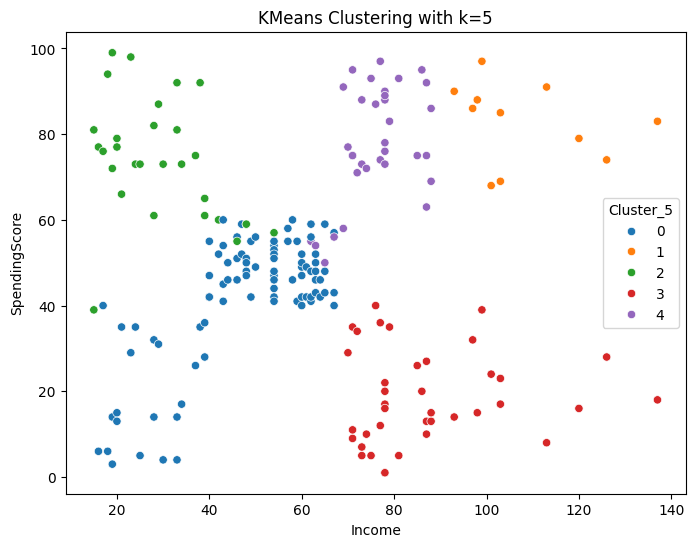

In [30]:
k_values = [3, 5]  #приклад вибраних кількостей кластерів

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_set['Cluster_' + str(k)] = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_' + str(k), palette='tab10')
    plt.title(f'KMeans Clustering with k={k}')
    plt.show()

11 in browser

In [ ]:
import plotly.express as px
import plotly.io as pio 
pio.renderers.default = 'browser' 

for k in k_values:
    fig = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age',
                        color='Cluster_' + str(k), title=f'3D Scatter KMeans k={k}')
    fig.show()


12          Agglomerative Clustering з різними linkage

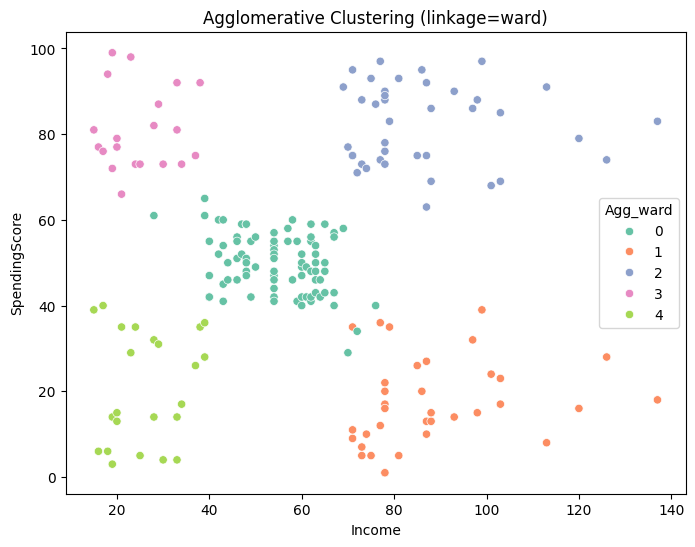

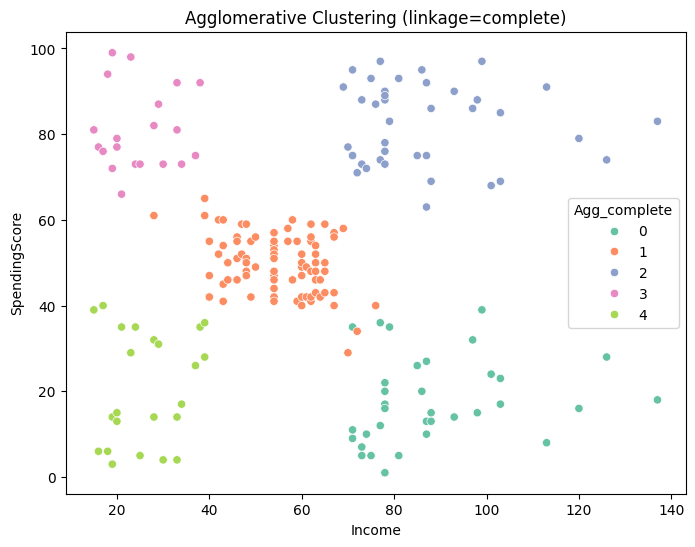

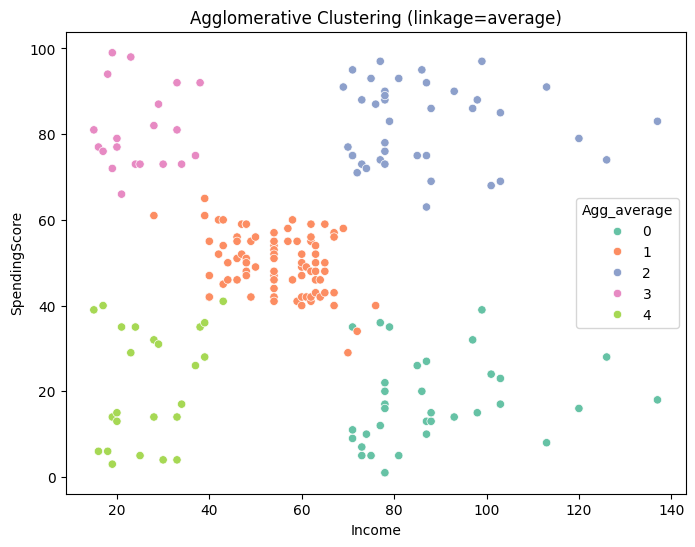

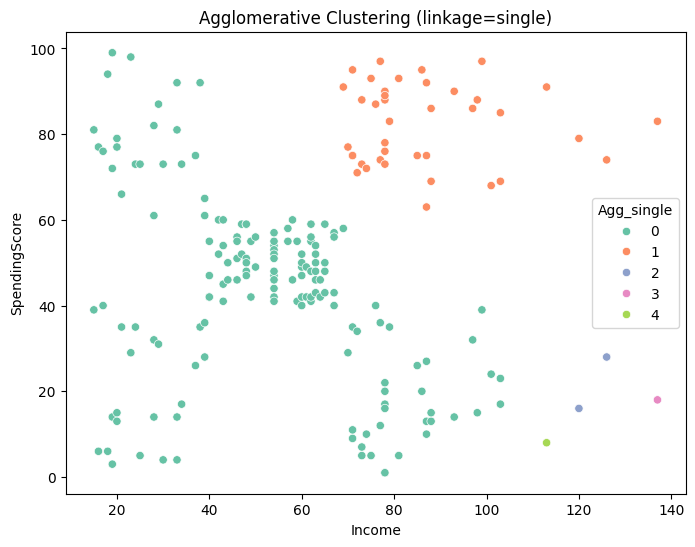

In [48]:
linkage_types = ['ward', 'complete', 'average', 'single']

for link in linkage_types:
    agg = AgglomerativeClustering(n_clusters=5, linkage=link)
    labels = agg.fit_predict(X)
    customer_set['Agg_' + link] = labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Agg_' + link, palette='Set2')
    plt.title(f'Agglomerative Clustering (linkage={link})')
    plt.show()

Дендрограми для різних методів

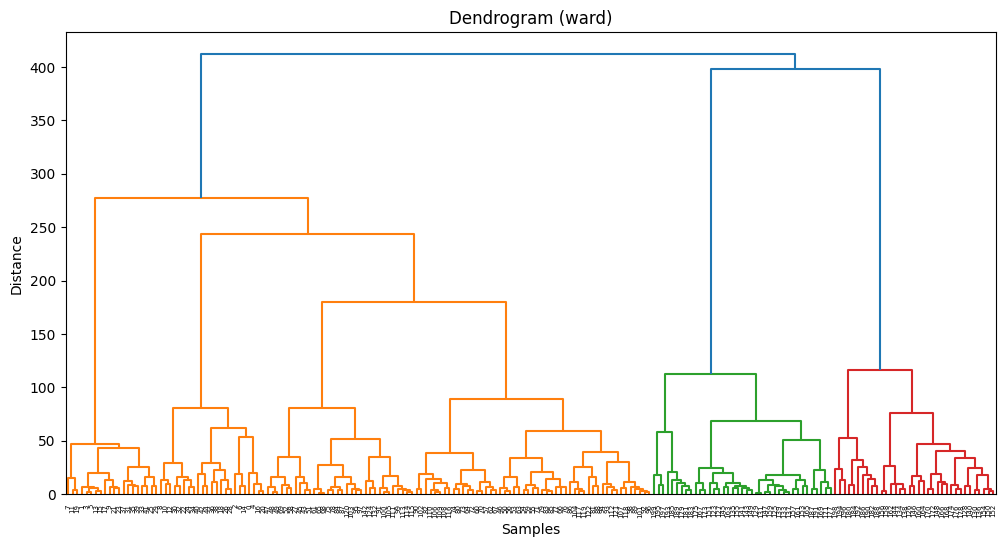

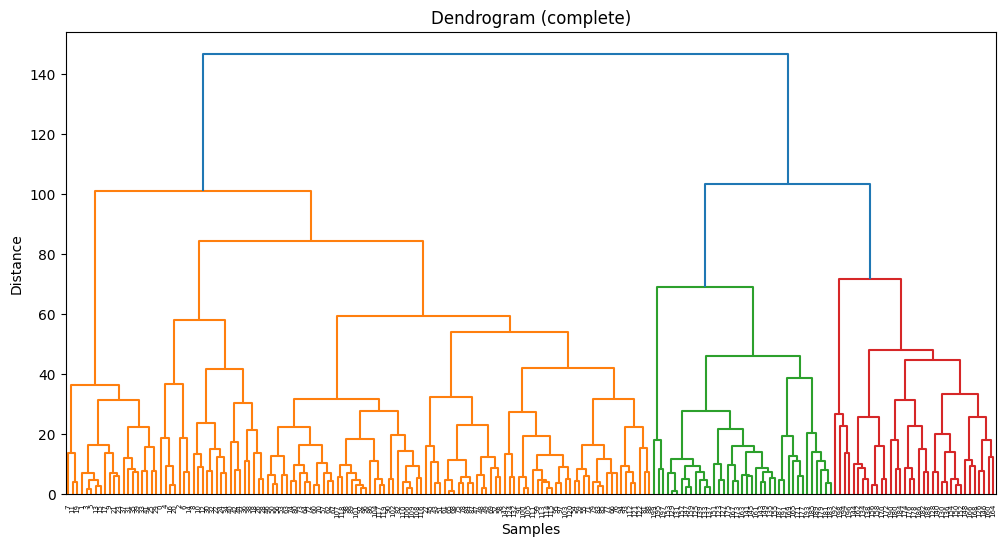

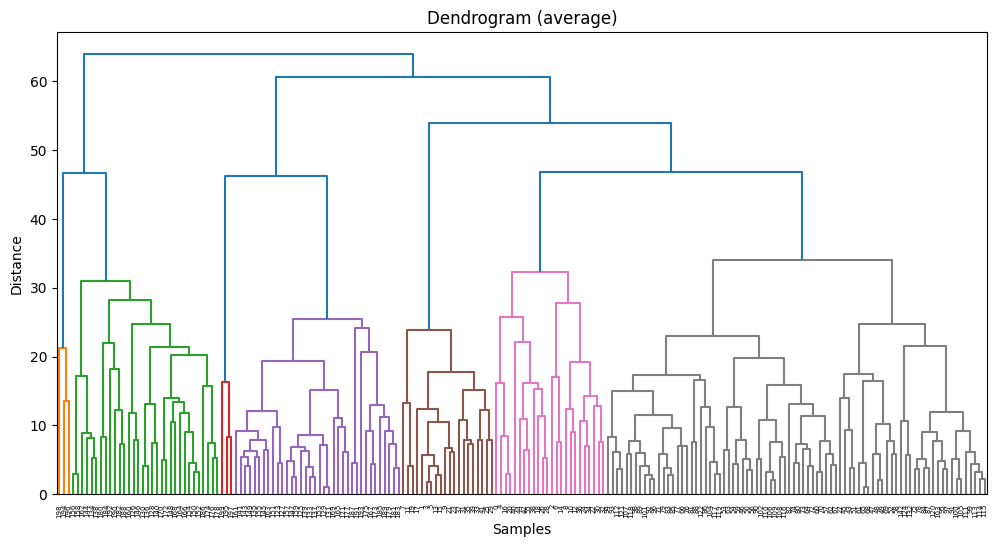

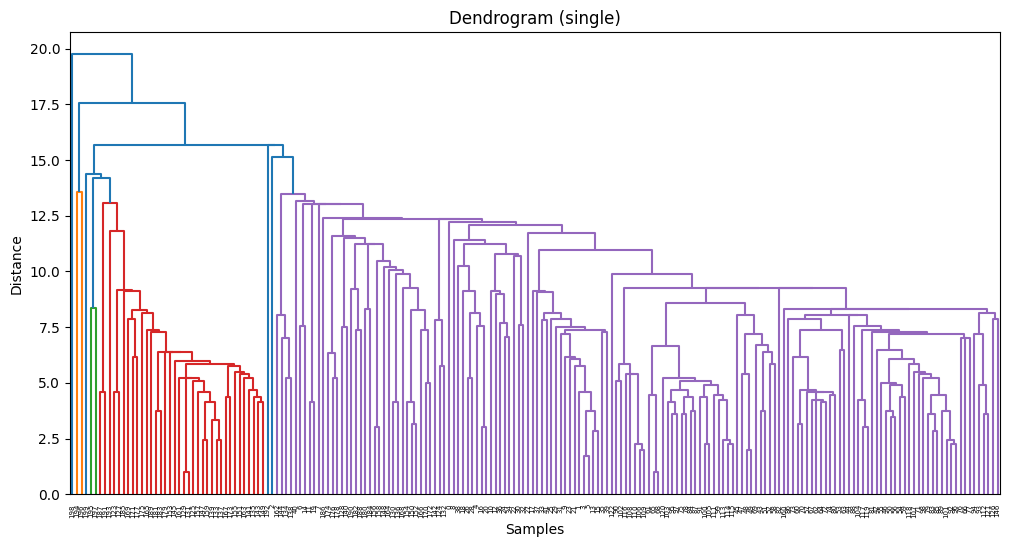

In [49]:
methods = ['ward', 'complete', 'average', 'single']
for method in methods:
    plt.figure(figsize=(12, 6))
    linkage_matrix = hierarchy.linkage(X, method=method)
    hierarchy.dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({method})')
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

13 візуалізація 5 кластерів KMeans і Agglomerative з Ward

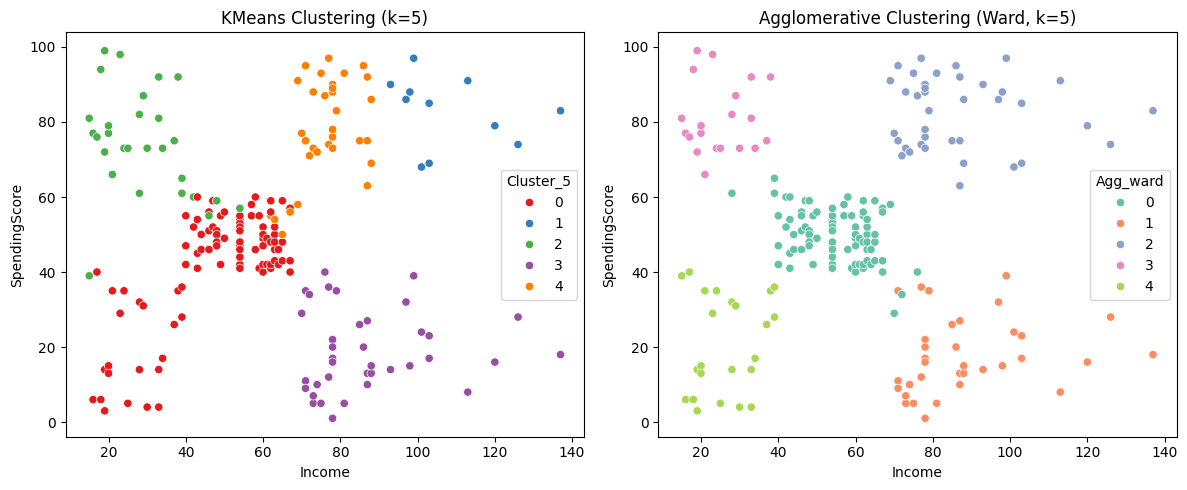

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_5', palette='Set1')
plt.title('KMeans Clustering (k=5)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Agg_ward', palette='Set2')
plt.title('Agglomerative Clustering (Ward, k=5)')

plt.tight_layout()
plt.show()